# Image Classifiaction

## Data Store Initiate

In [36]:
import os
import matplotlib as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Define constants
data_dir = '../data/dataset/sample/'
image_size = (224, 224)
custom_class_labels = ['effective', 'mildly effective', 'not effective']

# Set the best batch size and number of epochs
best_batch_size = 32
best_epochs = 10

# Create directories for training data
train_dir = os.path.join(data_dir, 'train')

# Create the directory if it doesn't exist
os.makedirs(train_dir, exist_ok=True)


# Data Processing

In [ ]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess images with custom class labels for training
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=best_batch_size,
    class_mode='categorical',
    classes=custom_class_labels,
    shuffle=True
)

# Create MobileNetV2 base model with pre-trained weights
base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3), include_top=False, weights='imagenet')

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(custom_class_labels), activation='softmax')(x)

# Create the final classification model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the best model based on training accuracy
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='accuracy', mode='max')

# Train the model using the best batch size and number of epochs
history = model.fit(train_data, epochs=best_epochs, callbacks=[model_checkpoint])

# Print the training results
print(f"Training completed with {best_batch_size} batch size and {best_epochs} epochs.")

# Overall Best Model

In [30]:
# Find the best model based on validation accuracy
print(f"Best Model: Batch Size - {best_batch_size}, Epochs - {best_epochs}")

Best Model: Batch Size - 32, Epochs - 10


# Train Best Model

In [31]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess images with custom class labels for training
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=best_batch_size,
    class_mode='categorical',
    classes=custom_class_labels,
    shuffle=True
)

# Create MobileNetV2 base model with pre-trained weights
base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3), include_top=False, weights='imagenet')

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(custom_class_labels), activation='softmax')(x)

# Create the final classification model
best_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the best model
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the best model
history = best_model.fit(train_data, epochs=best_epochs)

# Print the training results
print(f"Training completed with {best_batch_size} batch size and {best_epochs} epochs.")

Found 3 images belonging to 3 classes.


Epoch 1/10
1/1 [==============================] - 19s 19s/step - loss: 1.3389 - accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 1s 845ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 4.9657e-04 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 9.6428e-05 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.9471e-06 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 3.8147e-06 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 998ms/step - loss: 6.6751e-05 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 1.7404e-05 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 2.3047e-06 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1.9868e-07 - accuracy: 1.0000
Training 

# Summary of Best Model

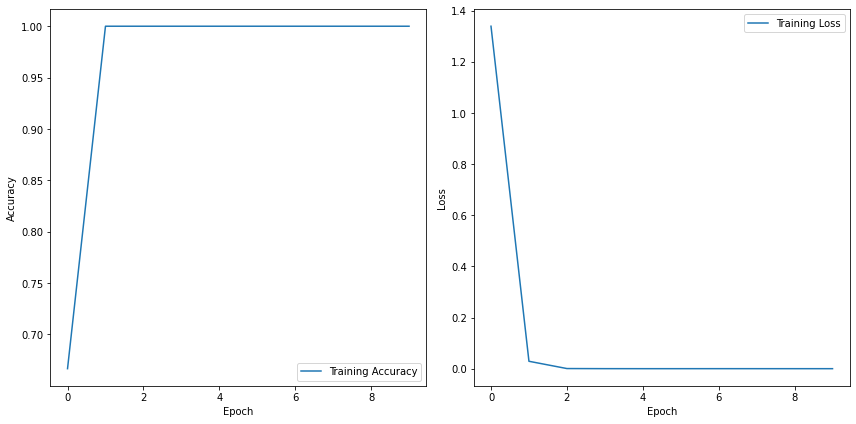

In [34]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Save Model

In [35]:

# Custom model name
model_name = "custom_sentiment_model"

# Save the model with a custom name
model.save(f'../data/model/Ads_Sentt_{best_batch_size}bs_{best_epochs}ep.keras')


# Testing

In [37]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('../data/model/Ads_Sentt_32bs_10ep.keras')


In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model



# Define the class labels
custom_class_labels = ['effective', 'mildly effective', 'not effective']

# Load and preprocess an image
img_path = '../data/dataset/sample/validation/not effective/Advertising-Perception.png'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class_label = custom_class_labels[predicted_class_index]

print(f"Predicted class label: {predicted_class_label}")


1/1 [==============================] - 0s 132ms/step
Predicted class label: not effective
